## Data Preprocess

In [90]:
import pandas as pd

names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]
training_data = pd.read_csv('adult.data', names=names, skipinitialspace=True)
training_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Preprocessing

In [91]:
# Drop any rows with missing values
training_data = training_data.dropna()
# training_data["workclass"].value_counts()

# Normalizing the data 
most_common_workclass = training_data["workclass"].mode()[0]
most_common_occupation = training_data["occupation"].mode()[0]
most_common_country = training_data["native-country"].mode()[0]

training_data['workclass'].replace('?', most_common_workclass, inplace=True)
training_data['occupation'].replace('?', most_common_occupation, inplace=True)
training_data['native-country'].replace('?', most_common_country, inplace=True)

## Clustering Model

In [98]:
# Select numerical features for clustering
numerical_features = ['age', 'education-num', 'capital-gain', 'fnlwgt', 'hours-per-week']
X = training_data[numerical_features]

In [99]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

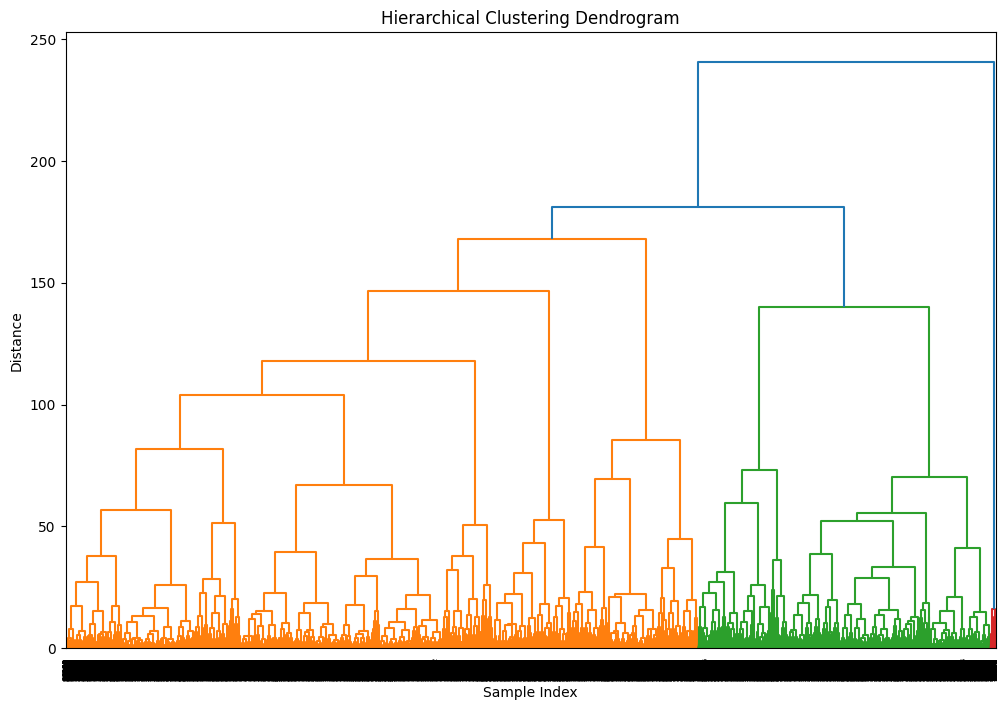

In [ ]:
import matplotlib.pyplot as plt

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## Pattern Extraction

In [104]:
# Cut the Dendrogram
from scipy.cluster.hierarchy import fcluster

# Define the number of clusters based on dendrogram analysis
num_clusters = 4  # Adjust as per your dendrogram interpretation

# Perform clustering and obtain cluster labels
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
training_data['cluster'] = cluster_labels

In [105]:
# Explore cluster characteristics (e.g., means of features within each cluster)
cluster_means = training_data.groupby('cluster').mean()

print("Cluster Means:\n", cluster_means)


Cluster Means:
                age         fnlwgt  education-num  capital-gain  capital-loss  \
cluster                                                                        
1        46.358491  192968.886792      12.918239  99999.000000      0.000000   
2        40.624500  218790.569156      12.534700   1124.972670    128.144168   
3        57.823897  151342.643335       8.430004    292.888765     88.027196   
4        32.442420  182686.823609       9.051440    359.359346     64.228001   

         hours-per-week  
cluster                  
1             49.798742  
2             43.727867  
3             33.073562  
4             40.314979  


/tmp/ipykernel_234813/565263022.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = training_data.groupby('cluster').mean()


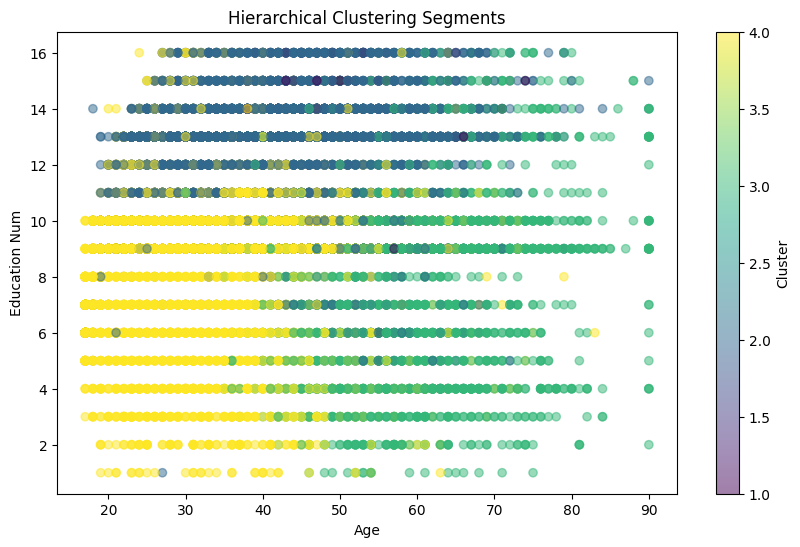

In [108]:
# Visualize clusters in the feature space (example with two features)
plt.figure(figsize=(10, 6))
plt.scatter(training_data['age'], training_data['education-num'], c=training_data['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Education Num')
plt.title('Hierarchical Clustering Segments')
# plt.legend()
plt.colorbar(label='Cluster')
plt.show()


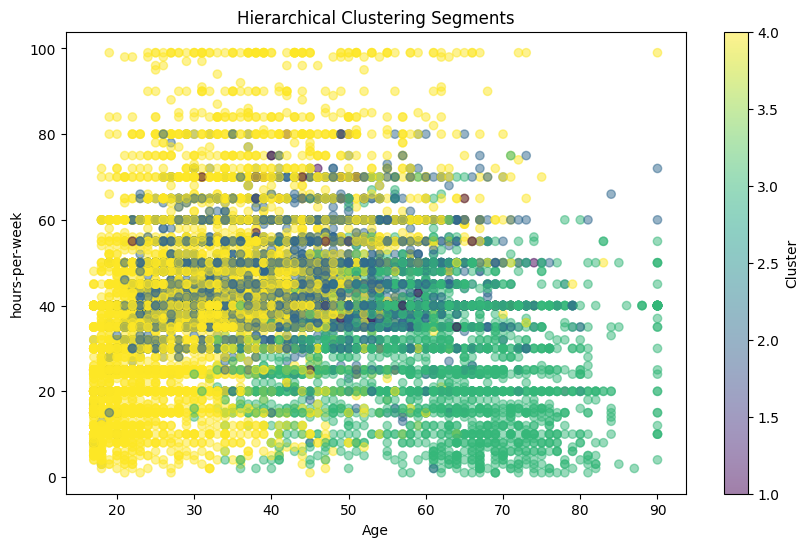

In [110]:
# Visualize clusters in the feature space (example with two features)
plt.figure(figsize=(10, 6))
plt.scatter(training_data['age'], training_data['hours-per-week'], c=training_data['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('hours-per-week')
plt.title('Hierarchical Clustering Segments')
# plt.legend()
plt.colorbar(label='Cluster')
plt.show()

## Model Performance Evaluation

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming 'linked' is the linkage matrix obtained from hierarchical clustering

# 1. Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# 2. Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_scaled, cluster_labels)
print("Calinski-Harabasz Index:", ch_score)

# 3. Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, cluster_labels)
print("Davies-Bouldin Index:", db_score)


Silhouette Score: 0.1644743657678317
Calinski-Harabasz Index: 6265.335898914026
Davies-Bouldin Index: 1.4802643213676148
